**Backgound**: I use Rossmann Stole Sales dataset from kaggle to conduct comprehensive analysis for project. The program contains 4 main parts: Descriptive Analytic,Diagnostic Analytic ,Predictive
Analytic, and Prescriptive Analytic

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
# Read in the files as dataframe
df_train = pd.read_csv("train.csv", parse_dates=['Date'])
df_store = pd.read_csv("store.csv")

<ipython-input-1-ecfa6a42c206>:12: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("train.csv", parse_dates=['Date'])


# **Data Processing**

In [2]:
# Show train data
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
# Check train data info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


The result displays the information of the data,The data contains 9 rows x 1017209 columns and column names.

In [4]:
# Check train data if there is any missing values
df_train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

It displays the null values for each column

In [5]:
# Check store data info
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
# Check store data if there is any missing values
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

It displays the missing values of each column for store dataset

In [7]:
# Merge train data and store data on store column
df_merged = df_train.merge(df_store, on="Store",how="left")
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

We merged the train data and store data, displays all columns information in the merged dataset

In [8]:
# Create new columns for Year,Month, and days extracted from Date
df_merged['Year'] = df_merged['Date'].dt.year
df_merged['Month'] = df_merged['Date'].dt.month
df_merged['Day'] = df_merged['Date'].dt.day

We created new columns: Year,Month and Day in the merged data for descriptive analysis

In [9]:
# check count,mean, std ,min and quartile of the merged data
df_merged.describe()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,2014-04-11 01:30:42.846061824,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774,2.013832e+03,5.846762e+00,1.570279e+01
min,1.000000e+00,1.000000e+00,2013-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000,2.013000e+03,1.000000e+00,1.000000e+00
25%,2.800000e+02,2.000000e+00,2013-08-17 00:00:00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000,2.013000e+03,3.000000e+00,8.000000e+00
50%,5.580000e+02,4.000000e+00,2014-04-02 00:00:00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000,2.014000e+03,6.000000e+00,1.600000e+01
75%,8.380000e+02,6.000000e+00,2014-12-12 00:00:00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000,2.014000e+03,8.000000e+00,2.300000e+01
max,1.115000e+03,7.000000e+00,2015-07-31 00:00:00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000,2.015000e+03,1.200000e+01,3.100000e+01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870,7.773960e-01,3.326097e+00,8.787638e+00


It displays information of count,mean,std, min, max and quartiles for all the columns in the dataset

In [10]:
# Check missing values
df_merged.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
Year                              0
Month                             0
Day                               0
dtype: int64

It displays the missing values count of each column of dataset

# **Descriptive Analytics**

**Task 1: Plot the histogram of Sales and calculate the Mean, Standard Deviation,Variance,Skewness,Kurtosis and Absolute Deviation**

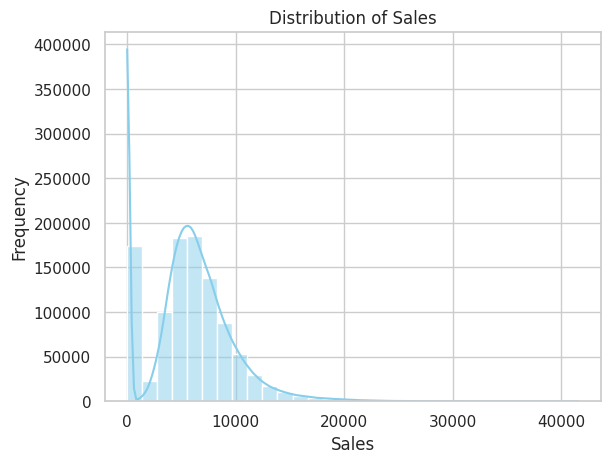

Mean of sales 5773.82
Standard Deviation of sales 3849.93
Variance of sales 14821931.55
Skewness of sales 0.64
Kurtosis of sales 1.78
Absolute Deviation of sales 2887.73


In [11]:
# Histogram for sales
sns.set(style="whitegrid")
sns.histplot(df_merged, x=df_merged['Sales'], kde=True, bins=30, color="skyblue")
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Mean
mean = df_merged['Sales'].mean()
# Standard Deviation
st_deviation = df_merged['Sales'].std()
# Variance
variance = df_merged['Sales'].var()
# Skewness
skewness = df_merged['Sales'].skew()
# Kurtosis
kurtosis = df_merged['Sales'].kurtosis()
# Absolute Deviation
abs_deviation = (df_merged['Sales'] - df_merged['Sales'].mean()).abs().mean()

# Disply result
print("Mean of sales",round(mean,2))
print("Standard Deviation of sales",round(st_deviation,2))
print("Variance of sales",round(variance,2))
print("Skewness of sales",round(skewness,2))
print("Kurtosis of sales",round(kurtosis,2))
print("Absolute Deviation of sales",round(abs_deviation,2))

We have conducted the histogram plot to have a view of the distribution of the sales and display the mean,std,variance,skewness,Kurtosis and Absolute Deviation of sales

**Task 2: Sales Trends: We use historical data to analyze the sales trends over time**

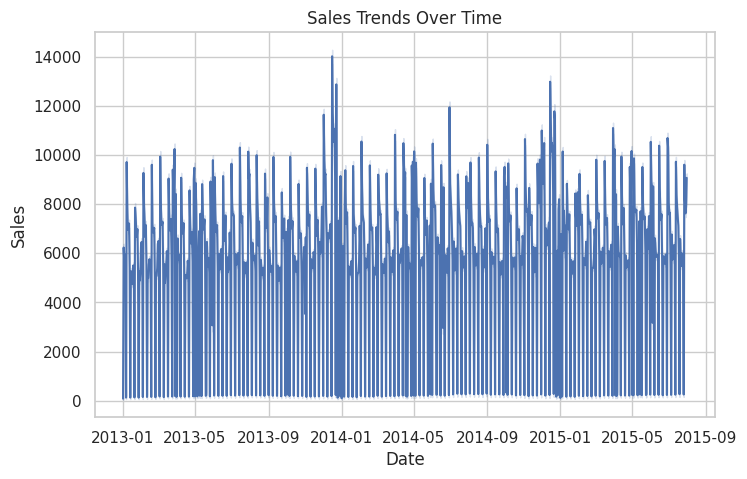

In [12]:
# Plot for sales trend over time
plt.figure(figsize=(8,5))
sns.lineplot(data=df_merged,x="Date",y="Sales")
plt.title('Sales Trends Over Time')
plt.show()

We created plot for the sales tread overtime, upon examining the visualizations, it is apparent that there was a sale peak at the end of year for both 2013 and 2014. The sale patterns are pretty similar for each year

**Task3: Sales Distribution: Analysis of the distribution of sales across different time include days,months, and seasons.**

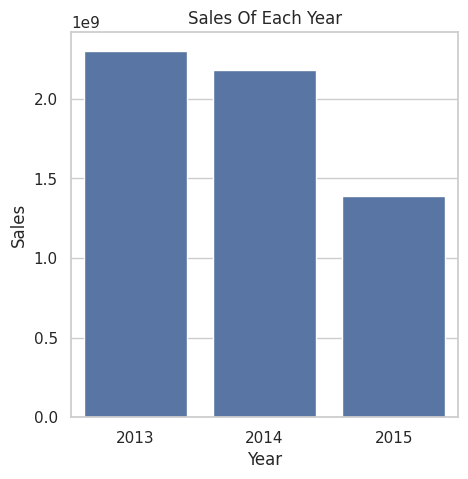

In [13]:
# Plots of sales over year
plt.figure(figsize=(5,5))

# Create sales column for Year,Month
sales_by_year = df_merged.groupby(['Year'])['Sales'].sum().reset_index()

# Plot for sales column for year
sns.barplot(data=sales_by_year, x="Year", y="Sales")
plt.title('Sales Of Each Year')
plt.show()


Upon examining the visualizations, it is apparent that the sales performance peaked in the year 2013. Subsequently, there was a decline in sales in 2014, and the lowest sales occurred in 2015 which has shorter duration of six months. In general terms, the sales figures across the three years are relatively close.

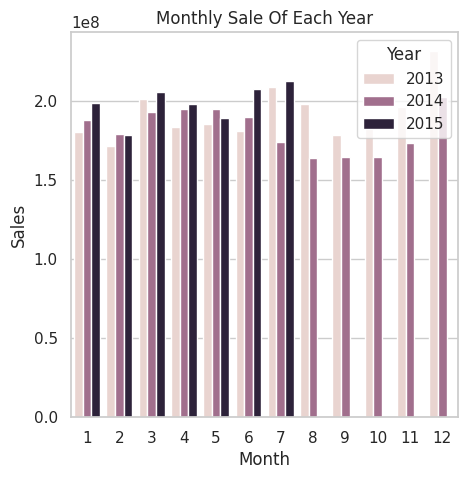

In [14]:
# Plot for Month of Sales of Each years
plt.figure(figsize=(5,5))
sales_by_month = df_merged.groupby(['Year','Month'])['Sales'].sum().reset_index()
sns.barplot(data=sales_by_month, x="Month", y="Sales",hue ="Year")
plt.title("Monthly Sale Of Each Year")
plt.show()

Upon analyzing the visualizations, it is evident that sales reached their peak in December. Additionally, there is a consistent growth in sales from January to June across the three years. Among the years, the monthly sales is bit lower compared to other years

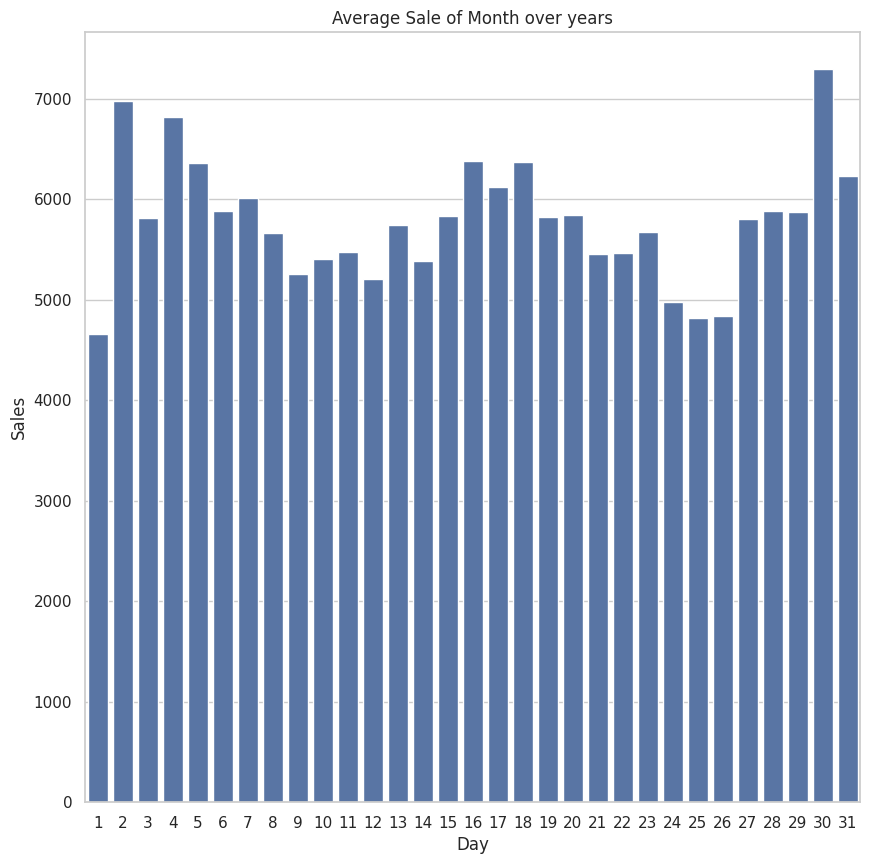

In [15]:
# Plot of Average Sale of Month over years
plt.figure(figsize=(10,10))
sales_by_day = df_merged.groupby('Day')['Sales'].mean().reset_index()
sns.barplot(data=sales_by_day, x="Day", y="Sales")
plt.title("Average Sale of Month over years")
plt.show()

Upon reviewing the visualizations, it becomes clear that sales attained their highest points both at the start and the end of each month. For other days, there is no significant pattern of sales.

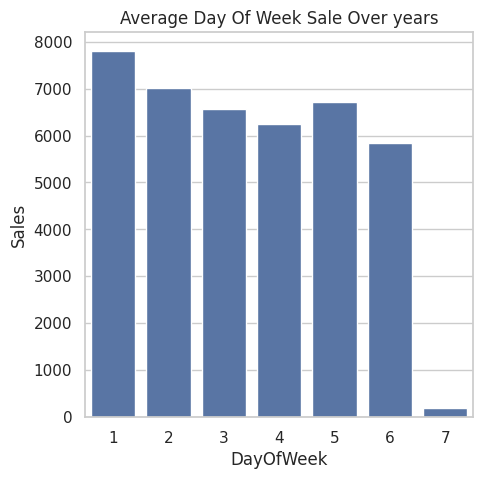

In [16]:
# Plot of Days Of Week Sales Over Year
plt.figure(figsize=(5,5))
sales_by_dayofweek = df_merged.groupby(['DayOfWeek'])['Sales'].mean().reset_index()
sns.barplot(data=sales_by_dayofweek, x="DayOfWeek", y="Sales")
plt.title("Average Day Of Week Sale Over years")
plt.show()

After examining the visualizations, it is evident that Monday records the highest sales among the days of the week. Friday ranked as the second highest sale day. There is also a sale decline from Monday to Thursday.

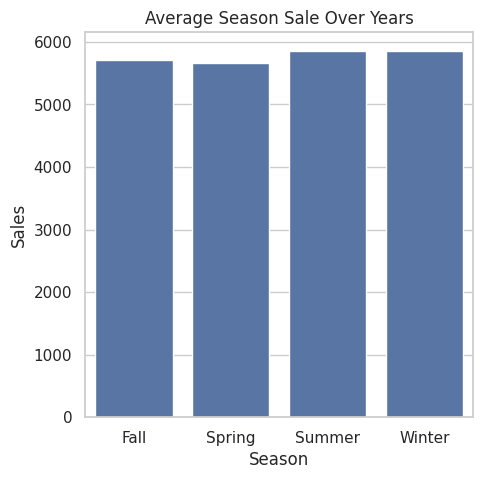

In [17]:
# Function that maps months to seasons
def get_season(month):
    if month >=3 and month <= 5:
        return 'Spring'
    elif month >=6 and month <= 8:
        return 'Summer'
    elif month >=9 and month <= 11:
        return 'Fall'
    else:
        return 'Winter'
# Create new column for Season
df_merged['Season'] = df_merged["Month"].map(get_season)

# Create Season data from all_data
season_total_sales = df_merged.groupby('Season')['Sales'].mean().reset_index()

# Plot the Season data
plt.figure(figsize=(5,5))
sns.barplot(x='Season', y='Sales', data=season_total_sales)
plt.title('Average Season Sale Over Years')
plt.xlabel('Season')
plt.ylabel('Sales')
plt.show()

Upon analyzing the visualizations, it shows that both Summer and Winter have the high sale and they show similar sales figures. Fall and spring sales are a bit lower compared to summer and winnter.

**Task 4.Promotion Effectiveness: Comparing the result between promotion and non-promotion store sales by analysing both scenarios.**

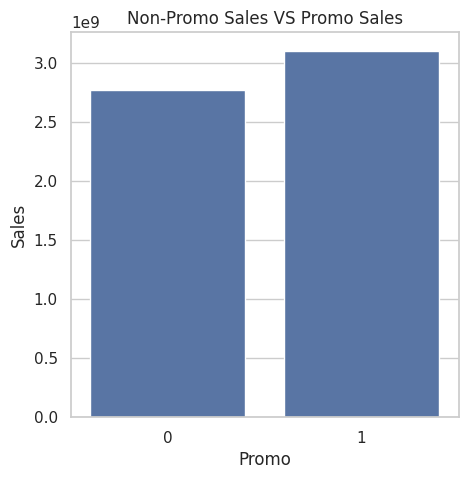

In [18]:
# Plot the Promo and non-promo sale
promo_sale = df_merged.groupby('Promo')['Sales'].sum().reset_index()
plt.figure(figsize=(5,5))
sns.barplot(x='Promo', y='Sales', data=promo_sale)
plt.title('Non-Promo Sales VS Promo Sales')
plt.show()

Upon analyzing the visualizations, it is evident that sales are higher in column 1 which indicates that promotion will help increase the sales and lead higher sales compared to sales without promotion

# **Diagnostic Analytics**

**Task 1: Factors Influencing Sales: Analyze factors (like store type, promotion,customers etc.) are most strongly correlated with store’s sales.**

In [19]:
# Rename the feaure variable for StoreType Column and Use dummies methods to convert the catergorical variable to numerical variable
type_dict={'a':'Type A', 'b':'Type B', 'c':'Type C','d':'Type D'}
df_merged['StoreType'] = df_merged['StoreType'].map(type_dict)
type_dumm = pd.get_dummies(df_merged["StoreType"])
df_merged = pd.concat([df_merged,type_dumm],axis=1)
df_merged.drop("StoreType",axis=1,inplace=True)



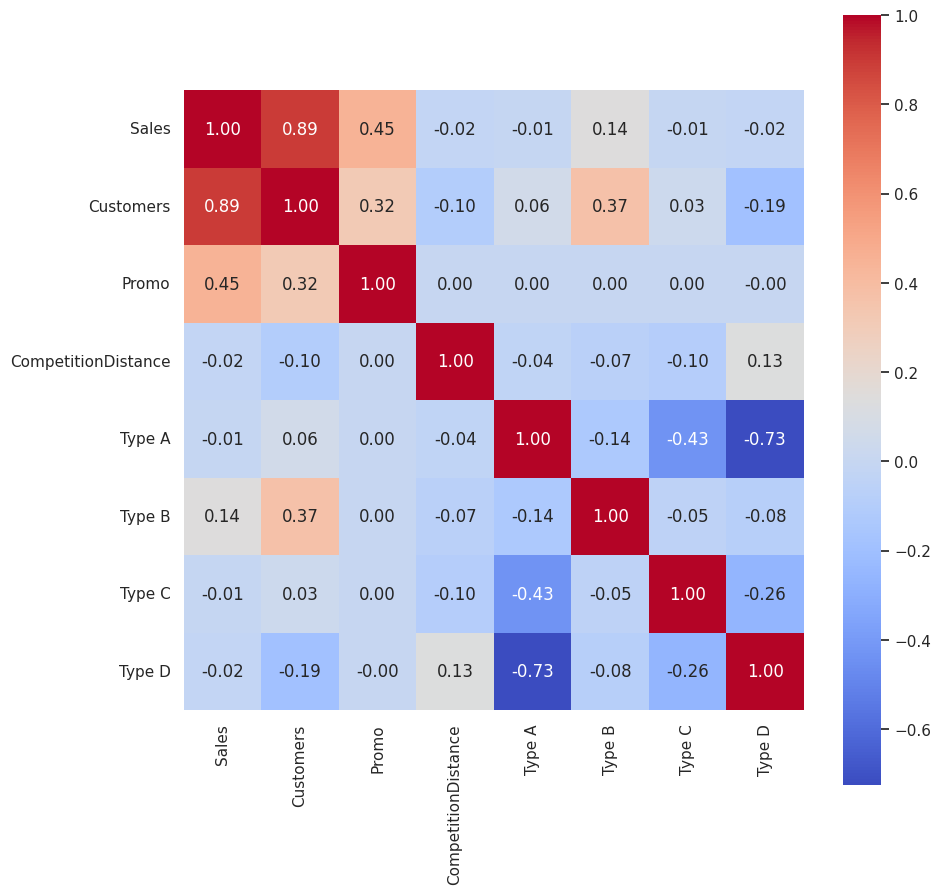

In [20]:
# Calculate the correlations between "Sales" and other columns and plot the heat map
columns = ['Sales','Customers', 'Promo','CompetitionDistance','Type A','Type B','Type C','Type D']
correlation = df_merged[columns].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.show()

Upon analyzing the visualizations, There is strong positive correlation between 'Sales' and 'Customers,' indicating sales increase with more customers. Moderate positive correlation between 'Sales' and 'Promo,' indicating that promotions boost sales. Weak negative correlation between 'Sales' and 'CompetitionDistance,' implying closer competitors may lead to lower sales. Among the 4 different store types, Type B stores exhibit a stronger correlation with 'Sales', indicating that this store type is associated with higher sales and could be considered more popular in terms of sales performance.

**Task2: Promotion Analysis: Conduct analysis about which types of promotions work best for sales.**

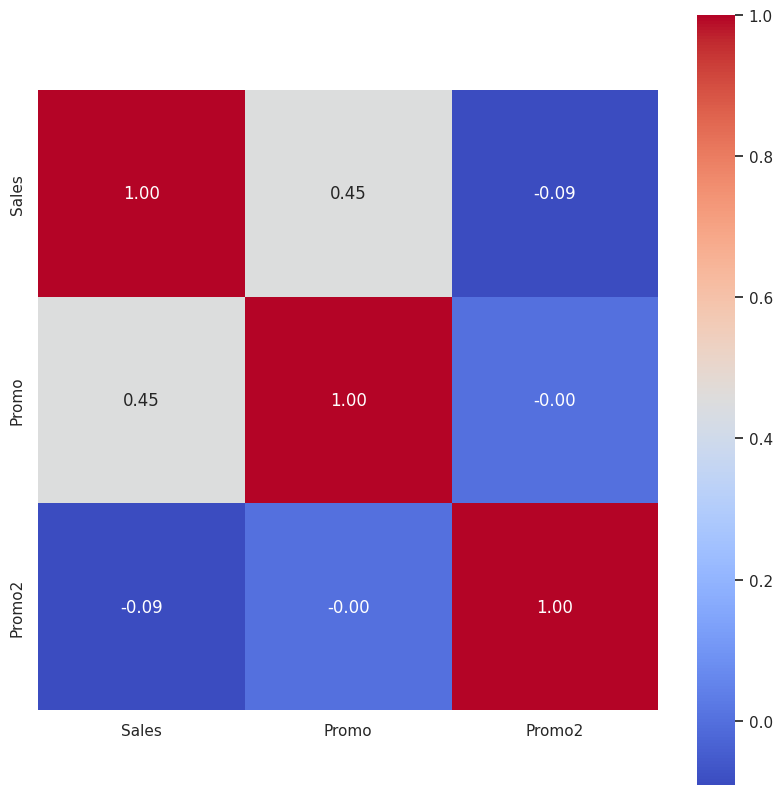

In [21]:
# Calculate the corrlation bewteen 'Sale'and 'Promo','Promo2'
plt.figure(figsize=(10,10))
columns = ['Sales','Promo','Promo2']
sns.heatmap(df_merged[columns].corr(),annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.show()

Based on the analysis of visualizations, it appears that engaging in promotions is associated with higher sales. However, it's noteworthy that there is a low correlation between continuing and consecutive promotions and achieving higher sales. This suggests that while promotions may contribute to increased sales, the frequency or continuity of promotions may not have a strong linear relationship with sales.

**Task 3:Determine if there is the significant difference in sales between 2013 and 2014.**

In [22]:
from scipy.stats import ttest_ind

# Extract sales data for the two years
sales_2013 = df_merged[df_merged["Year"] == 2013]["Sales"]
sales_2014 = df_merged[df_merged["Year"] == 2014]["Sales"]

# Perform an independent samples t-test
t_statistic, p_value = ttest_ind(sales_2013, sales_2014, equal_var=False)

# Display the results
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("There is a significant difference in sales between 2013 and 2014.")
else:
    print("There is no significant difference in sales between 2013 and 2014.")


T-Statistic: -20.016201634916257
P-Value: 4.192327684827034e-89
There is a significant difference in sales between 2013 and 2014.


From the t test, we know that the sales of 2013 and 2014 were not closed since there is significant difference in sales as the result shows

**Task 4:Determine if there is the association between sales and StoreType**

In [23]:
from scipy.stats import chi2_contingency

# Create categorical variables based on sales bins
bins = [0, 100, 200, 300, 400, float('inf')]  # Adjust bins based on your data
labels = ['0-100', '101-200', '201-300', '301-400', '401+']
SalesCategory = pd.cut(df_merged['Sales'], bins=bins, labels=labels)

# Create types of store
types = ['Type A','Type B','Type C','Type D']
for i in types:
  # Create a contingency table
  contingency_table = pd.crosstab(df_merged[i], SalesCategory)

  # Perform the chi-square test
  chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

  # Display the results
  print(f"Chi-square Statistic: {chi2_stat}")
  print(f"P-Value: {p_value}")

  # Interpret the results
  if p_value < 0.05:
      print("There is a significant association between sales and",i)
  else:
      print("There is no significant association between sales and",i)


Chi-square Statistic: 3.736018772923834
P-Value: 0.44290889225812435
There is no significant association between sales and Type A
Chi-square Statistic: 0.11264857831133321
P-Value: 0.9984721094039061
There is no significant association between sales and Type B
Chi-square Statistic: 9.251828872837862
P-Value: 0.05510411214283778
There is no significant association between sales and Type C
Chi-square Statistic: 2.6514661494912195
P-Value: 0.6177337223018593
There is no significant association between sales and Type D


From the chi-square test, we know that all the store types does not associated with sales, which indicates that sales are not dependent to store types

**Task 5: Outlier detection and handling for Sales**


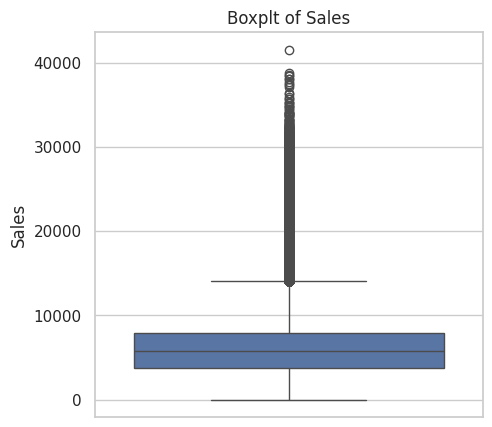

In [24]:
# Check outlier for Sales
plt.figure(figsize=(5,5))
sns.boxplot(df_merged['Sales'])
plt.title("Boxplt of Sales")
plt.show()

The plot shows that there is many outliers in the sales columns and we will need to handle these outliers

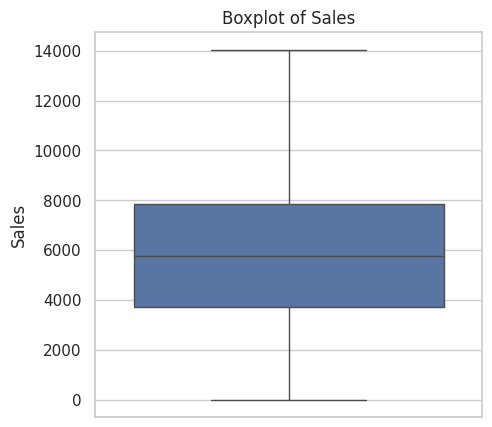

In [25]:
# Lowerbound and Upperbound calculation
Q1 = df_merged['Sales'].quantile(0.25)
Q3 = df_merged['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers in the column with lowerbound or upperbound
df_merged['Sales'] = df_merged['Sales'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Double Check outlier for Sales
plt.figure(figsize=(5,5))
sns.boxplot(df_merged['Sales'])
plt.title("Boxplot of Sales")
plt.show()

We calculated the lowerbound and upperbound value to replac these outliers and the plot shows there is no more outliers.

**Task 6: Anova of sales and StateHoliday**

In [26]:
from scipy.stats import f_oneway

# Perform one-way ANOVA
grouped_anova = df_merged.groupby('StateHoliday')['Sales']

# Extract values for each group
Public_Holiday= grouped_anova.get_group('a')
Easter = grouped_anova.get_group('b')
Christmas = grouped_anova.get_group('c')
No_Holiday = grouped_anova.get_group('0')

# Perform ANOVA
f_statistic, p_value = f_oneway(Public_Holiday, Easter, Christmas, No_Holiday)

# Display the results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print('There are significant differences in sales across holiday periods.')
else:
    print('There is no significant difference in sales across holiday periods.')


F-statistic: 26501.930303465804
P-value: 0.0
There are significant differences in sales across holiday periods.


We have conducted the anova of sales and StateHoliday and indicates that sales are different across these holiday periods.

# **Data Cleaning**

**Fill Missing Values**

In [27]:
# Check missing values
df_merged.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
Year                              0
Month                             0
Day                               0
Season                            0
Type A                            0
Type B                            0
Type C                            0
Type D                            0
dtype: int64

In [28]:
# Replace the NaN values by median or 0 and double check the result
df_merged["CompetitionDistance"].fillna(df_merged["CompetitionDistance"].median(), inplace = True)
df_merged['CompetitionOpenSinceMonth'].fillna(0,inplace=True)
df_merged['CompetitionOpenSinceYear'].fillna(0,inplace=True)
df_merged['Promo2SinceWeek'].fillna(0,inplace=True)
df_merged['Promo2SinceYear'].fillna(0,inplace=True)
df_merged['PromoInterval'].fillna(0,inplace=True)
df_merged.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
Day                          0
Season                       0
Type A                       0
Type B                       0
Type C                       0
Type D                       0
dtype: int64

In [29]:
# Rename the feaure variable for StateHoliday Column and Use dummies methods to convert the catergorical variable to numerical variable
holiday_dict={'a':'Public Holiday', 'b':'Easter', 'c':'Christmas','0':"No Holiday"}
df_merged['StateHoliday'] = df_merged['StateHoliday'].map(holiday_dict)
holiday_dumm = pd.get_dummies(df_merged["StateHoliday"])
df_merged = pd.concat([df_merged,holiday_dumm],axis=1)
df_merged.drop("StateHoliday",axis=1,inplace=True)
df_merged.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Assortment,CompetitionDistance,...,Day,Season,Type A,Type B,Type C,Type D,Christmas,Easter,No Holiday,Public Holiday
0,1,5,2015-07-31,5263.0,555,1,1,1,a,1270.0,...,31,Summer,False,False,True,False,False,False,True,False
1,2,5,2015-07-31,6064.0,625,1,1,1,a,570.0,...,31,Summer,True,False,False,False,False,False,True,False
2,3,5,2015-07-31,8314.0,821,1,1,1,a,14130.0,...,31,Summer,True,False,False,False,False,False,True,False
3,4,5,2015-07-31,13995.0,1498,1,1,1,c,620.0,...,31,Summer,False,False,True,False,False,False,True,False
4,5,5,2015-07-31,4822.0,559,1,1,1,a,29910.0,...,31,Summer,True,False,False,False,False,False,True,False


In [30]:
# Rename the feaure variable for Assortment Column and Use dummies methods to convert the catergorical variable to numerical variable
Assortment_dict = {'a':'Basic', 'b':'Extra', 'c':'Extended'}
df_merged['Assortment'] = df_merged['Assortment'].map(Assortment_dict)
Assortment_dum = pd.get_dummies(df_merged['Assortment'])
df_merged = pd.concat([df_merged,Assortment_dum],axis=1)
df_merged.drop('Assortment',axis=1,inplace =True)
df_merged.head()



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,Type B,Type C,Type D,Christmas,Easter,No Holiday,Public Holiday,Basic,Extended,Extra
0,1,5,2015-07-31,5263.0,555,1,1,1,1270.0,9.0,...,False,True,False,False,False,True,False,True,False,False
1,2,5,2015-07-31,6064.0,625,1,1,1,570.0,11.0,...,False,False,False,False,False,True,False,True,False,False
2,3,5,2015-07-31,8314.0,821,1,1,1,14130.0,12.0,...,False,False,False,False,False,True,False,True,False,False
3,4,5,2015-07-31,13995.0,1498,1,1,1,620.0,9.0,...,False,True,False,False,False,True,False,False,True,False
4,5,5,2015-07-31,4822.0,559,1,1,1,29910.0,4.0,...,False,False,False,False,False,True,False,True,False,False


In [31]:
# # Rename the feaure variable for PromoInterval Column and Use dummies methods to convert the catergorical variable to numerical variable
df_merged['PromoInterval']= df_merged['PromoInterval'].replace(0,"No Interval")
interval_dum = pd.get_dummies(df_merged['PromoInterval'])
df_merged = pd.concat([df_merged,interval_dum],axis=1)
df_merged.drop('PromoInterval',axis=1,inplace =True)
df_merged.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,Easter,No Holiday,Public Holiday,Basic,Extended,Extra,"Feb,May,Aug,Nov","Jan,Apr,Jul,Oct","Mar,Jun,Sept,Dec",No Interval
0,1,5,2015-07-31,5263.0,555,1,1,1,1270.0,9.0,...,False,True,False,True,False,False,False,False,False,True
1,2,5,2015-07-31,6064.0,625,1,1,1,570.0,11.0,...,False,True,False,True,False,False,False,True,False,False
2,3,5,2015-07-31,8314.0,821,1,1,1,14130.0,12.0,...,False,True,False,True,False,False,False,True,False,False
3,4,5,2015-07-31,13995.0,1498,1,1,1,620.0,9.0,...,False,True,False,False,True,False,False,False,False,True
4,5,5,2015-07-31,4822.0,559,1,1,1,29910.0,4.0,...,False,True,False,True,False,False,False,False,False,True


In [32]:
# Dataframe info
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 33 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  float64       
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   SchoolHoliday              1017209 non-null  int64         
 8   CompetitionDistance        1017209 non-null  float64       
 9   CompetitionOpenSinceMonth  1017209 non-null  float64       
 10  CompetitionOpenSinceYear   1017209 non-null  float64       
 11  Promo2                     1017209 no

In [33]:
# Drop columns
df_merged.drop(["Date","Season"],axis=1,inplace =True)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 31 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  float64
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   SchoolHoliday              1017209 non-null  int64  
 7   CompetitionDistance        1017209 non-null  float64
 8   CompetitionOpenSinceMonth  1017209 non-null  float64
 9   CompetitionOpenSinceYear   1017209 non-null  float64
 10  Promo2                     1017209 non-null  int64  
 11  Promo2SinceWeek            1017209 non-null  float64
 12  Promo2SinceYear            1017209 non-null  float64
 13  Year        

We drop the irrelevant columns of train data

# **Predictive Analytics**

In [34]:
# Get X and Y for model training
X = df_merged.drop(["Sales","Customers"],axis=1)
Y = df_merged["Sales"]


In [35]:
# Data split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

**Task 1 : Linear Regression model**

In [36]:
# Linear Regression model prediction
model1= LinearRegression()
model1.fit(X_train,y_train)
y_pre=model1.predict(X_test)

# Display the combined DataFrame and Prediction Accuracy
results_df = pd.DataFrame({
    'Actual': y_test,
    'Forecasted': y_pre
})


r2 = r2_score(y_test, y_pre)
print('Accuracy:',round(r2*100),'%')
results_df.head()



Accuracy: 62 %


,Actual,Forecasted
104311,9313.0,7989.374720
619484,8436.0,6351.863834
262496,10986.0,7769.990423
292486,6093.0,6406.532780
319602,0.0,1302.370618


Here we have trained linear model with our data and create table to show and obtain the accuracy of the actual value and forecasted value. Accuracy is 62%.

**Task 2: RandomForest model**

In [37]:
# RandomForest model prediction
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestRegressor(n_estimators=42,n_jobs=-1)
model2.fit(X_train,y_train)
y_pre=model2.predict(X_test)

# Display the combined DataFrame and Prediction Accuracy
results_df = pd.DataFrame({
    'Actual': y_test,
    'Forecasted': y_pre
})

r2 = r2_score(y_test, y_pre)
print('Accuracy:',round(r2*100),'%')
results_df.head()

Accuracy: 96 %


,Actual,Forecasted
104311,9313.0,7921.095238
619484,8436.0,9425.250000
262496,10986.0,10896.071429
292486,6093.0,7177.547619
319602,0.0,0.000000


Here we have trained Random Forest model with our data and create table to show and obtain the accuracy of the actual value and forecasted value. Accuracy is 96%.

**Task 3: KNeighborsRegressor**

In [38]:
# KNeighborsRegressor model prediction
from sklearn.neighbors import KNeighborsRegressor
model3 = KNeighborsRegressor()
model3.fit(X_train,y_train)
y_pre=model3.predict(X_test)

# Display the combined DataFrame and Prediction Accuracy
results_df = pd.DataFrame({
    'Actual': y_test,
    'Forecasted': y_pre
})

r2 = r2_score(y_test, y_pre)
print('Accuracy:',round(r2*100),'%')
results_df.head()

Accuracy: 63 %


,Actual,Forecasted
104311,9313.0,7148.4
619484,8436.0,5411.4
262496,10986.0,11075.6
292486,6093.0,2980.6
319602,0.0,6072.2


Here we have trained KNeighbors Regressor() model with our data and create table to show and obtain the accuracy of the actual value and forecasted value. Accuracy is 64%.


Accuracy camparation :The best model for our sale forecast is RandomForest model which achived accuracy of 96%